In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_num_of_nsrf(pattern):
    assert len(pattern)==6    
    retVal=0
    for i in range(6):
        if pattern[i]=='1':
            retVal+=1
    return retVal

In [3]:
filedir="/home/mitsuki/out/altorf/genome/patternanalyze/transdeg"
#basename="GCF_000242335.1_ASM24233v3"#Prevotella dentalis DSM 3688 (908937)
basename="GCF_000265365.1_ASM26536v1"
filepath="{0}/{1}_chromosome_simu3_transdeg.csv".format(filedir,basename)
df=pd.read_csv(filepath,dtype={'idx':str})
df=df.set_index('idx')        

total=np.sum(np.sum(df))
for idx in df.index:
    for clm in df.columns:
        dif=get_num_of_nsrf(idx)-get_num_of_nsrf(clm)
        df.loc[idx,clm]=df.loc[idx,clm]*dif/total

sym_df=pd.DataFrame(0,index=df.index, columns=df.columns)
for i in range(df.shape[0]):
    for j in range(i):
        sym_df.iloc[i,j]=df.iloc[i,j]+df.iloc[j, i]

## Samples

* Prevotella dentalis DSM 3688 (908937)

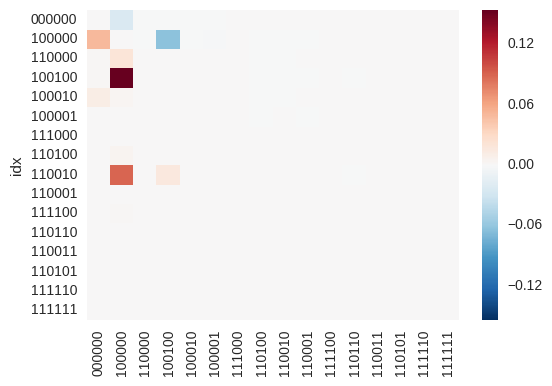

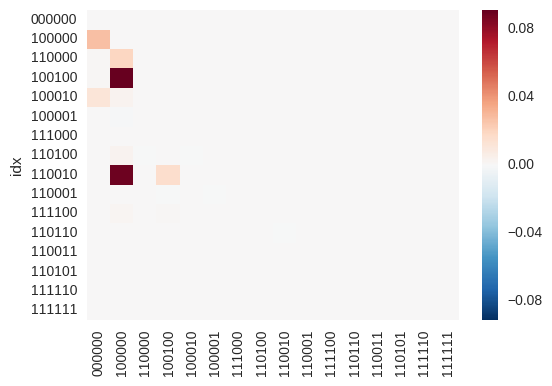

In [20]:
sns.heatmap(df)
plt.show()
sns.heatmap(sym_df)
plt.show()

* Alistipes finegoldii DSM 17242 (679935)

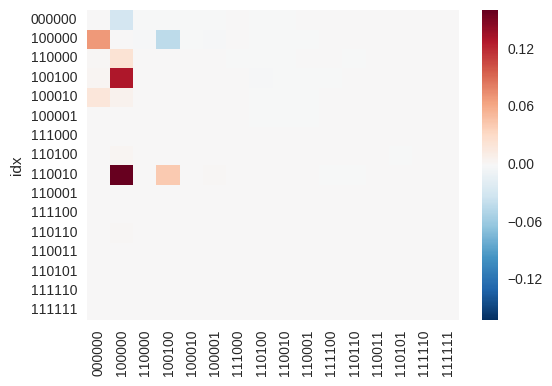

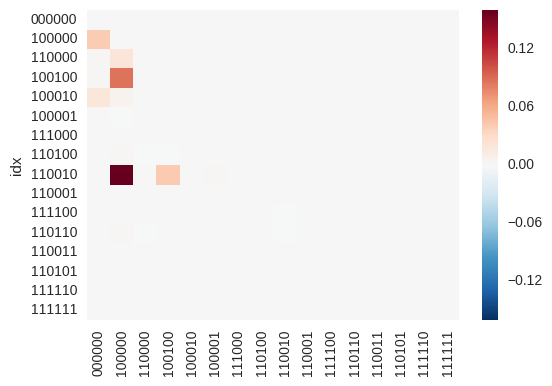

In [16]:
sns.heatmap(df)
plt.show()
sns.heatmap(sym_df)
plt.show()

## top contribution analysis

In [4]:
mat=df.as_matrix()
arg=np.argsort(mat,axis=None)

In [6]:
ms=0
ps=0
for i in mat.flatten():
    if i<0:
        ms+=i
    else:
        ps+=i
print(ms,ps,mat.sum())

-0.0810093900486 0.475540075099 0.39453068505


In [10]:
remain=ms
for idx in arg[:2]:
    print("{0}({1},{2}):{3}".format(idx,df.index[idx//16], df.index[idx%16], mat.flatten()[idx]))
    remain-=mat.flatten()[idx]
print("other: {}".format(remain))

19(100000,100100):-0.0422177227123474
1(000000,100000):-0.02936117672896345
other: -0.009430490607273172


In [17]:
remain=ps
for idx in arg[-4:]:
    print("{0}({1},{2}):{3}".format(idx,df.index[idx//16], df.index[idx%16], mat.flatten()[idx]))
    remain-=mat.flatten()[idx]
print("other: {}".format(remain))

131(110010,100100):0.04283212007263495
16(100000,000000):0.07007317060105953
49(100100,100000):0.13013091431111967
129(110010,100000):0.16137385034844418
other: 0.07113001976570413


In [72]:
mat.flatten()[arg[:5]]

array([-0.04221772, -0.02936118, -0.0014685 , -0.00136565, -0.00130191])

In [73]:
mat.flatten()[arg[-5:]]

array([ 0.02281841,  0.04283212,  0.07007317,  0.13013091,  0.16137385])

In [42]:
mat.flatten()

array([      0, -109627,    -980,   -2634,    -766,   -2038,       0,
          -213,     -12,       0,       0,       0,       0,       0,
             0,       0,  261635,       0,   -5483, -157630,   -2180,
         -4861,       0,   -3140,   -1718,    -186,       0,       0,
             0,       0,       0,       0,    7874,   85198,       0,
             0,       0,       0,     -15,    -705,   -1183,       0,
             0,    -442,       0,       0,       0,       0,    9676,
        485875,       0,       0,       0,       0,       0,   -5099,
         -2974,    -149,     -16,       0,       0,       0,       0,
             0,   73730,   24971,       0,       0,       0,       0,
             0,     -16,     -72,     -15,       0,       0,       0,
             0,       0,       0,    3074,    3382,       0,       0,
             0,       0,       0,     -81,      -3,     -16,       0,
             0,       0,       0,       0,       0,       0,     404,
            89,     

In [56]:
np.max(mat)

602528

In [58]:
mat[arg==(16*16-1)]

/home/mitsuki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 16 but corresponding boolean dimension is 4
  if __name__ == '__main__':


array([], shape=(0, 16), dtype=int64)

In [65]:
mat[arg==255]

array([0])

In [66]:
mat

array([[      0, -109627,    -980,   -2634,    -766,   -2038,       0,
           -213,     -12,       0,       0,       0,       0,       0,
              0,       0],
       [ 261635,       0,   -5483, -157630,   -2180,   -4861,       0,
          -3140,   -1718,    -186,       0,       0,       0,       0,
              0,       0],
       [   7874,   85198,       0,       0,       0,       0,     -15,
           -705,   -1183,       0,       0,    -442,       0,       0,
              0,       0],
       [   9676,  485875,       0,       0,       0,       0,       0,
          -5099,   -2974,    -149,     -16,       0,       0,       0,
              0,       0],
       [  73730,   24971,       0,       0,       0,       0,       0,
            -16,     -72,     -15,       0,       0,       0,       0,
              0,       0],
       [   3074,    3382,       0,       0,       0,       0,       0,
            -81,      -3,     -16,       0,       0,       0,       0,
             

In [43]:
np.argsort(mat.flatten())

array([ 19,   1,  18,  55,  21,  23,  56,   3,  20,   5,  24,  40,   2,
         4,  39,  43,   7,  25,  57, 138, 139,  87,  72,  58,  71,  89,
        38,  73,   8, 125,  88, 182, 173, 172, 171, 170, 169, 166, 159,
       187, 186, 174, 188, 175, 152, 157, 121, 122, 123, 124, 126, 254,
       134, 135, 136, 137, 140, 141, 142, 143, 150, 151, 189, 153, 154,
       155, 156, 158, 190,   0, 192, 234, 235, 236, 237, 238, 239, 240,
       241, 242, 233, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       244, 230, 228, 224, 198, 199, 201, 202, 203, 204, 205, 206, 120,
       207, 209, 210, 212, 214, 216, 218, 219, 220, 221, 222, 223, 191,
       119, 127,  75,  50,  51,  52,  53,  54,  59,  60,  61,  62,  63,
        66,  67,  68,  69,  70,  74, 118,  76,  77,  78,  79,  47,  46,
        45,  44,   6,   9,  10,  11,  12,  13,  14,  15,  17,  22,  82,
        26,  28,  29,  30,  31,  34,  35,  36,  37,  41,  42,  27,  83,
       255, 103,  86,  92, 104, 102, 101,  93, 105, 106,  90, 10

In [45]:
type(mat[0][0])

numpy.int64

In [48]:
arr=np.array([[1,2],[4,3]])
arr

array([[1, 2],
       [4, 3]])

In [53]:
arg=np.argsort(arr, axis=None)

In [55]:
arg.reshape((2,2))

array([[0, 1],
       [3, 2]])